# Principal-Agent Model

The principal-agent model is known from game theory and is often used to describe the interaction between an employer and employee. It solves the problem of different objectives and find an optimal contract that incentivizes the agent to excert effort, although this is costly for him. For reference see Laffont, Martimort (2002).

When running the cells with sympy-output you may experience a pop-up window saying something like "Would you allow the app to make changes on your computer (MikTeX Package Manager)" (At least I do). It seems like the code runs regardless of your answer to this.

In [1]:
# import relevant packages
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from fractions import Fraction
import sympy as sm 
from scipy import optimize
sm.init_printing(use_unicode=True) # for pretty printing

# Introduction to the Model

The principal-agent model considers one principal, P, and one agent, A. The agent chooses an effort level, $e \geq 0 $, which is costly for him according to the following cost function:
\\[
\begin{eqnarray*}
C(e) & = & \frac{1}{2}ce^2, \quad c>0
\end{eqnarray*}\\]

The output, $y$, produced by the agent is the sum of the agent's effort and an exogenous noise term $\epsilon$:
\\[
\begin{eqnarray*}
y & = & e+\epsilon, \quad  \epsilon \sim N(0,\sigma^2)
\end{eqnarray*}\\]

P can observe $y$ but neither $e$ or $\epsilon$. We assume that P offers A a linear contract consisting of a salary, $s$, and a performance-contigent component, $by$. $b$ is a commission rate paid to A. So A's wage payment is equal to (if he accepts the contract):
\\[
\begin{eqnarray*}
w & = & s+by
\end{eqnarray*}\\]
If A doesn't accept the contract he gets $\underline{u}$=0.

A is risk neutral and wants to maximize the following utility function:
\\[
\begin{eqnarray*}
u(w,e) & = & E(w)-C(e)=s+be-\frac{1}{2}ce^2
\end{eqnarray*}\\]

P is also risk neutral and maximizes the expected payoff under the constraints that ensures (IC) A chooses the contract that is meant for him and (PC) A accepts the contract relative to the outside option:
\\[
\begin{eqnarray*}
E(\pi) & = & E(y-w)=e-s-be
\end{eqnarray*}\\]
\\[
\begin{eqnarray*}
s.t. 
\end{eqnarray*}\\]
\\[
\begin{eqnarray*}
(IC) \quad e & = & e^*
\end{eqnarray*}\\]
\\[
\begin{eqnarray*}
(PC) \quad u(w,e) & \geq & \underline{u}
\end{eqnarray*}\\]

The timing of events is as follows:
* P chooses the parameters of the contract $(s, b)$ and makes a contract offer to A
* A accepts or rejects the contract
* If A accepts the contract, he determines his level of effort
* The noise term is realized and both players receive their payoff

# Analytical Solution 

## The Algorithm

**Problem:** Find the optimal contract that P can offer A to incentivize A to maximize P's objective function.

**Inputs:** The two maximization problems from the model described above.
    
**Outputs:** $b^*$, $s^*$, $e^*$.

**Algorithm:** `solve_pa_model()`

Use rationality to solve the model by backwards induction as the agents can foresee the rational actions. 
  1. Optimize A's unconstrained utility problem: 
      * a. Differentiate and set equal to 0
      * b. Isolate e
  2. Consider P's constrained maximization problem:
      * a. Substitute one contraint into the other constraint
      * b. Substitute the combined constraint into the objective
      * c. Differentiate the unconstrained problem and set equal to 0
      * d. Isolate b
  3. Find the optimal contract: solve the system of equations to get $b^*$, $s^*$, $e^*$ 
      

## Solve with Algebra

In [2]:
# read the module where the variables are defined as symbols
exec(open('symbols.py').read())

**Step 1** Consider A's unconstrained utility problem: 

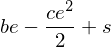

In [3]:
u = s + b*e - Fraction(1,2)*c*e**2
u

**Step 1.a** Differentiate and set equal to 0

In [4]:
A_foc = sm.diff(u, e) 
A_foc

**Step 1.b** Isolate e 

In [5]:
e_star = sm.solve(A_foc, e)
e_star

**Step 2.a** Consider P's constrained maximization problem: Substitute one contraint into the other constraint

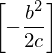

In [6]:
PC = s + b*e - Fraction(1,2)*c*e**2

# substituting (IC) into (PC)
PC_e_star = PC.subs(e, e_star[0]) 

# isolate s in the combined constraint (we use this later on)
s_star = sm.solve(PC_e_star, s)
s_star

**Step 2.b** Substitute the combined contraint into the objective

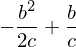

In [7]:
# profits (P's objective)
pi = e - s - b*e

# substituting the combined constraint into profits 
pi_uncon = pi.subs({s:s_star[0], e:e_star[0]}) 
pi_uncon

**Step 2.c** Differentiate the unconstrained problem and set equal to 0

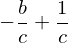

In [8]:
#solve the unconstrained problem
P_foc = sm.diff(pi_uncon, b) 
P_foc

**Step 2.d** Isolate b

In [9]:
b_star = sm.solve(P_foc, b)
b_star

**Step 3** Find the optimal contract: solve the system of equations to get $b^*$, $s^*$, $e^*$ 

In [10]:
e_star = e_star[0].subs(b, b_star[0])
e_star

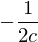

In [11]:
s_star = s_star[0].subs(b, b_star[0])
s_star

From this we see that it is optimal for the principal to "sell" the firm to the agent with the negative fixed salary, $s^*$. The agents then gets a commission rate, $b$, equal to 1 which means that the agent gets all the provenue of production. This is optimal as it incentivizes the agent to excert effort.

## Graphical Representation

In this section I will present the results of the model for different values of c.

In [12]:
# a. look at different values of c
c_vec = [0.5, 1, 2, 3, 4, 5, 10, 15, 20, 25, 30]

# b. make python function out of the analytical results
e_func = sm.lambdify(c, e_star)
s_func = sm.lambdify(c, s_star)
b_func = sm.lambdify(c, b_star[0]) 
u_func = sm.lambdify((c, e, s, b), u)
pi_func = sm.lambdify((e, s, b), pi)

# c. create empty list for each parameter
e_vec = []
s_vec = []
b_vec = []
u_vec = []
pi_vec = []

# d. fill out the list with different value of c
for i in range(len(c_vec)):
    
    # i. optimal contract
    e_vec.append(e_func(c_vec[i]))
    s_vec.append(s_func(c_vec[i]))
    b_vec.append(b_func(c_vec[i]))
    
    # ii. utility and profit
    u_vec.append(u_func(c_vec[i], e_vec[i], s_vec[i], b_vec[i]))
    pi_vec.append(pi_func(e_vec[i], s_vec[i], b_vec[i]))

# e. print some of the results    
print(f'e_star for different values of c: {e_vec[:3]}')
print(f's_star for different values of c: {s_vec[:3]}')
print(f'b_star for different values of c: {b_vec[:3]}')
print(f'u for different values of c: {u_vec[:3]}')
print(f'pi for different values of c: {pi_vec[:3]}')

e_star for different values of c: [2.0, 1.0, 0.5]
s_star for different values of c: [-1.0, -0.5, -0.25]
b_star for different values of c: [1, 1, 1]
u for different values of c: [0.0, 0.0, 0.0]
pi for different values of c: [1.0, 0.5, 0.25]


<Figure size 432x288 with 0 Axes>

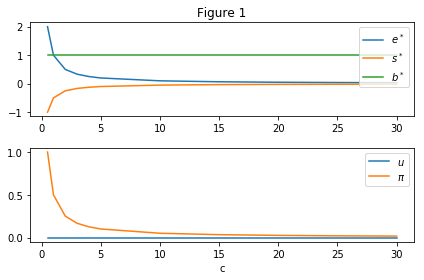

In [13]:
# a. create plots
fig = plt.figure() 
fig, ax = plt.subplots(2, 1)

# b. upper figure with contract variables
ax[0].plot(c_vec, e_vec, label = '$e^*$')
ax[0].plot(c_vec, s_vec, label = '$s^*$')
ax[0].plot(c_vec, b_vec, label = '$b^*$')
ax[0].legend(loc = 'upper right')
ax[0].set_title('Figure 1')

# c. lower figure with utility and profits
ax[1].plot(c_vec, u_vec, label = '$u$')
ax[1].plot(c_vec, pi_vec, label = '$\pi$')
ax[1].legend(loc = 'upper right')
ax[1].set_xlabel('c')

# d. show
fig.tight_layout()
plt.show()

From figure 1 we see that the commission rate is 1 independently of c. The effort and salary are perfectly negatively correlated.
Futhermore it is seen from the lower graph that the agent always get a utility equal to his outside option = 0. The profit of P is decreasing in c as P needs to require a lower payment (the negative salary) from A to compensate A for the higher costs.


# Numerical Solution

The model can also be solved numerically with scipy optimize. First we need to set the parameter of the model: c to an arbitrary number. Then we define the objective function and the constraints from the principals problem. The maximization problem of the agent is implicitly included in the equality constraint. At last the model is solved and the result is compared with the analytical solution.

In [14]:
# a. set parameter to an arbitrary number
c_par = 2

# b. define objective
def _objective(e, s, b):
    return -(e - s - b*e) # negative as it is a maximization problem

def objective(x): # use a vector of parameters: x = [e, s, b]
    return _objective(x[0],x[1],x[2])

# c. define constraints
def eq_constraint(x):
    eq = x[0]
    eq = eq - x[2]/c_par
    return eq

ineq_con = {'type': 'ineq', 'fun': lambda x: x[1] + x[2]*x[0] - 1/2*c_par*x[0]**2}
eq_con = {'type': 'eq', 'fun': eq_constraint}

# d. initial guess
x0 = [1, 2, 3]

# e. optimize
result = optimize.minimize(objective, x0, method = 'SLSQP', constraints = [ineq_con, eq_con])

# f. show results and compare to analytical solution
print(f'Numerical result: e = {result.x[0]}, s = {result.x[1]}, b = {result.x[2]}')
print(f'Analytical result: e = {e_func(c_par)}, s = {s_func(c_par)}, b = {b_func(c_par)}')

Numerical result: e = 0.49999858633611555, s = -0.2499985863235172, b = 0.9999971726722311
Analytical result: e = 0.5, s = -0.25, b = 1


The numerical and analytical results are equivalent as expected.

# Extension of the Model

As an extension of the model I will look at a risk-averse agent. This means that the agent now maximizes the following utility function:
\\[
\begin{eqnarray*}
u(w,e) & = & E(w)- \frac{1}{2}rVar(w) - C(e)=s+be-\frac{1}{2}rb^2\sigma^2-\frac{1}{2}ce^2, \quad r,\sigma>0
\end{eqnarray*}\\]

**Step 1** Consider A's unconstrained utility problem: 

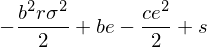

In [15]:
# agent's objective: maximize utility (unconstrained problem)
u_new = s + b*e - Fraction(1,2)*r*b**2*sigma - Fraction(1,2)*c*e**2
u_new 

**Step 1.a-b** Differentiate, set equal to 0 and isolate e

In [16]:
# 1.a
A_foc_new = sm.diff(u_new, e) 

# 1.b
e_star_new = sm.solve(A_foc_new, e)
e_star_new

This is exactly the same as we found in the basic model, so we can conclude that the extension has no effect on A's maximization problem.

**Step 2.a** Consider P's constrained maximization problem: Substitute one contraint into the other constraint

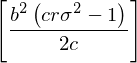

In [17]:
PC_new = s + b*e -  Fraction(1,2)*r*b**2*sigma - Fraction(1,2)*c*e**2

# substitute (IC) into (PC)
PC_e_star_new = PC_new.subs(e, e_star_new[0]) 
s_star_new = sm.solve(PC_e_star_new, s)
s_star_new

**Step 2.b-d** Substitute the combined contraint into the objective, differentiate and set equal to zero and isolate b.

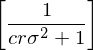

In [18]:
# 2.b substituting PC into profits 
pi_uncon_new = pi.subs({s:s_star_new[0], e:e_star_new[0]}) 

# 2.c solve the unconstrained problem
P_foc_new = sm.diff(pi_uncon_new, b) 

# 2.d find the optimal contract
b_star_new = sm.solve(P_foc_new, b)
b_star_new

It is obvious that b_star_new < b_star as long as all the parameters are positive (and they are). This means that it is no longer optimal for the principal to give the agent a commission rate equal to 1.

**Step 3** Find the optimal contract: solve the system of equations to get $b^*$, $s^*$, $e^*$ 

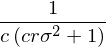

In [19]:
e_star_new = e_star_new[0].subs(b, b_star_new[0])
e_star_new

Effort is lower in this model than in the basic model.

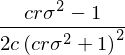

In [20]:
s_star_new = s_star_new[0].subs(b, b_star_new[0])
s_star_new

# Comparison of the Models

This section will compare the utility and profits in the two versions of the model.

In [21]:
# make python function out of the analytical results
e_func_new = sm.lambdify((c, r, sigma), e_star_new)
s_func_new = sm.lambdify((c, r, sigma), s_star_new)
b_func_new = sm.lambdify((c, r, sigma), b_star_new[0])
u_func_new = sm.lambdify((c, r, sigma, e, s, b), u_new)
# pi-function is the same as in the basic model

In [22]:
# a. set the new parameters to arbitrary numbers
r = 0.25
sigma = 2

# b. create empty list for each parameter
e_vec_new = []
s_vec_new = []
b_vec_new = []
u_vec_new = []
pi_vec_new = []

# c. fill in the list with the functions found in section 5
for i in range(len(c_vec)):
    
    # i. optimal contract
    e_vec_new.append(e_func_new(c_vec[i], r, sigma))
    s_vec_new.append(s_func_new(c_vec[i], r, sigma))
    b_vec_new.append(b_func_new(c_vec[i], r, sigma))
    
    # ii. utility and profit
    u_vec_new.append(u_func_new(c_vec[i], r, sigma, e_vec_new[i], s_vec_new[i], b_vec_new[i]))
    pi_vec_new.append(pi_func(e_vec_new[i], s_vec_new[i], b_vec_new[i]))

I create a figure with two subplots that compare the utility and profits in the two versions of the model.

<Figure size 432x288 with 0 Axes>

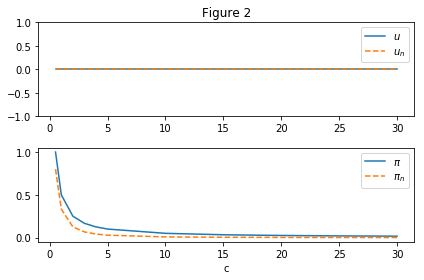

In [23]:
# a. plotting
fig = plt.figure()
fig, ax = plt.subplots(2, 1)

# b. upper graph with utility
ax[0].plot(c_vec, u_vec, label = '$u$')
ax[0].plot(c_vec, u_vec_new, label = '$u_n$', linestyle = 'dashed')
ax[0].legend(loc = 'upper right')
ax[0].set_ylim(-1, 1) # set y-axis to not confuse with the small variations in zero (python is not exactly 0) 
ax[0].set_title('Figure 2')

# c. lower graph with profits
ax[1].plot(c_vec, pi_vec, label = '$\pi$')
ax[1].plot(c_vec, pi_vec_new, label = '$\pi_n$', linestyle = 'dashed')
ax[1].legend(loc = 'upper right')
ax[1].set_xlabel('c')

# d. show
fig.tight_layout()
plt.show()

From figure 2 we see that A still gets an utility equal to his outside option independently of c. The lower plot shows that the profits is lower in the extended model than in the basic model. This happens when A is being risk-averse it is optimal for P to bear some of the risk of the stochastic term of the output $(b < 1)$. Also P needs to compensate A for the risk he puts on A. It would never be optimal for P to take all the risk himself as it would also remove all incentives to excert effort for A. Therefore we can say that there is a trade-off for P between insurance and incentive.

# Conclusion

In this notebook we have seen a basic principal-agent model solved analytically and numerically. Also the model was extended with a risk-averse agent which affected the result in a way so the principal got less profit as he then needed to insure the agent against risk. The agent got an utility equal to his outside option in both models. At this point I need to emphasize that this is a very stylized model.